# Analiza video iger

![valve](valve.png)

V svoji projektni nalogi bom analiziral 15219 najboljših iger glede na Metascore. Izločiti sem moral nekaj iger, katere niso imele kaksne ocene ali podatka. 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
igre = pd.read_csv('csvji/podatki.csv', index_col='stevilka')
ocene = pd.read_json("jsoni/ocene.json")
nekaj = pd.read_csv('csvji/igre.csv')
igre['Metascore'] = ocene['Metascore']
igre['Ocena uporabnikov'] = ocene['ocena_uporabnikov']
igre['ESBR'] = nekaj['esbr']
igre['Založnik'] = nekaj['Zaloznik']
igre['1.žanr'] = nekaj['zanr1']
igre['2.žanr'] = nekaj['zanr2']
igre['Založnik'] = igre['Založnik'].replace('Electronic', 'EA')
igre['Založnik'] = igre['Založnik'].replace('Intelligent', 'Intelligent Systems')
igre['Založnik'] = igre['Založnik'].replace('Q', 'Q Entertainment')
zamenjaj = {'pc':'PC', 'nintendo-64':'Nintendo 64', 'playstation':'Playstation', 'playstation-3':'Playstation 3', 'dreamcast':'Dreamcast', 
           'xbox-360':'Xbox 360', 'wii':'Wii', 'switch':'Switch', 'playstation-2':'Playstation 2', 'playstation-4':'Playstation 4', 
           'gamecube':'Gamecube','xbox':'Xbox', 'wii-u':'Wii U', 'game-boy-advance':'Game Boy Advance', '3ds':'Nintendo 3DS','ds':'Nintendo DS',
           'playstation-vita':'Playstation Vita', 'psp':'PSP', 'xbox-one':'Xbox One'}
igre = igre.replace({'konzola':zamenjaj})

igre = igre[:16500]
igre['Metascore'] = pd.to_numeric(igre['Metascore'], errors='coerce')
igre['Ocena uporabnikov'] = pd.to_numeric(igre['Ocena uporabnikov'], errors='coerce')
igre['Skupna ocena'] = (igre['Metascore'] + igre['Ocena uporabnikov']*10)/2
igre['Datum izdaje'] = pd.to_datetime(igre['Datum_izdaje'])
igre = igre.drop(['Datum_izdaje', 'url_do_igre'], axis=1)
igre = igre[pd.to_numeric(igre['Ocena uporabnikov'], errors='coerce').notnull()]


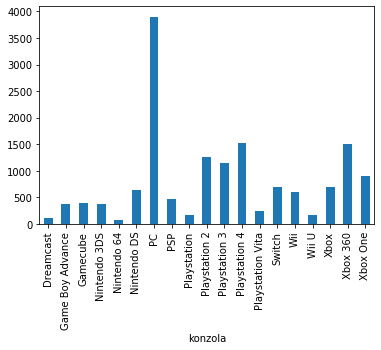

In [88]:
konzole = igre.groupby('konzola').size()
konzole.plot.bar()

Iz grafa se vidi, da je največ iger bilo izdanih za PC, ker je to največji trg za video igre. 

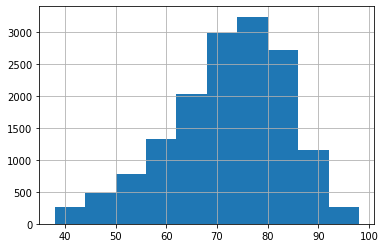

In [78]:
igre['Metascore'].hist()

V zgornjem histogramu je prikazana porazdelitev ocen iger glede na Metascore, ki zaradi velikega števila elementov spominja na Gaussovo porazdelitev. Podobno je v spodnjem grafu, ki je histogram porazdelitve ocen uporabnikov.


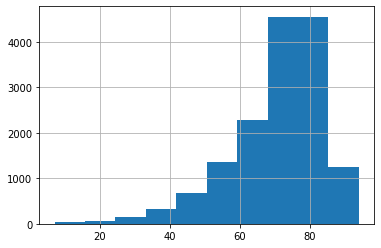

In [44]:
zmnozek = igre['Ocena uporabnikov']*10
zmnozek.hist()


In [82]:
igre.describe(percentiles=[.25, .5, .75])


,Metascore,Ocena uporabnikov,Skupna ocena
count,15219.000000,15219.000000,15219.000000
mean,71.635127,7.066010,71.147612
std,11.471074,1.307092,10.599036
min,38.000000,0.700000,25.500000
25%,65.000000,6.400000,65.000000
50%,73.000000,7.300000,72.500000
75%,80.000000,8.000000,79.000000
max,98.000000,9.400000,94.500000


In [95]:
Tabela prikazuje povprečja, popvrečno odstopanje od povprečja in kvantile posamezne kategorije, po kateri se je ocenjevalo igre. Za nadaljne izračune sem oceno uprabnikov pomožil z deset, za lažje primerjanje z oceno metascora.

SyntaxError: invalid syntax (<ipython-input-95-2b6d6fc4103b>, line 1)

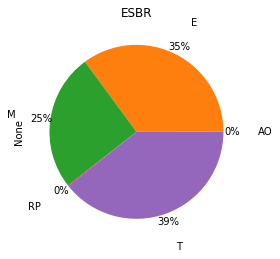

In [96]:
igre.groupby('ESBR').size().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4, title='ESBR')

Tortni diagram predstavlja deleže iger, ocenjene s posamično ESBR oceno. ESBR ocena je primernost igre za določeno starostno skupino, podobno kot to poznamo iz filmske industrije.
Z oznako E so označene igre, ki so primerne za vse starosti, T je za najstnike, M je za osebe, starejše od 17 let in AO za starejše od 18 let.

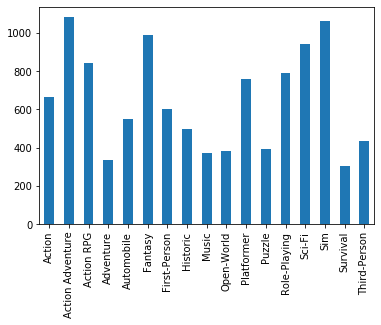

In [86]:
vsota1 =  igre.groupby(['1.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])
vsota2 = igre.groupby(['2.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])
vsota = vsota2.add(vsota1, fill_value=0)
vsota[vsota>300].plot.bar()

V grafu je je predstavljeno število iger, ki spadajo pod določen žanr. Iz grafa sem izločil nesmiselne žanre, kot so 3D, splošno ipd.


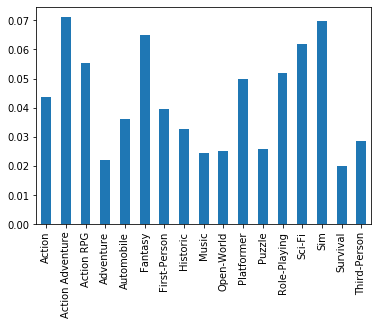

In [83]:
vsotaa = vsota/15219
vsotaa[vsotaa > 0.02].plot.bar()

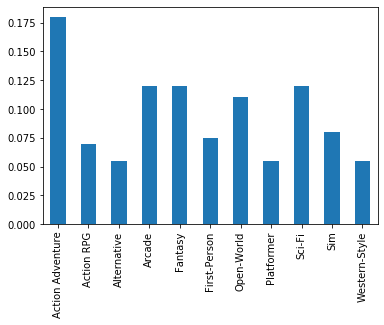

In [49]:
top200meta = igre[:200]
top200meta

vsota1 =  top200meta.groupby(['1.žanr']).size()
vsota2 = top200meta.groupby(['2.žanr']).size()
vsota = vsota2.add(vsota1, fill_value=0)
vsota = vsota/200
vsota[vsota>0.05].drop(labels=['3D', '2D', 'General', 'Modern']).plot.bar()

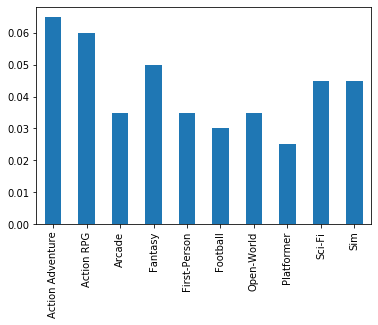

In [50]:
top200spl = igre.sort_values('Skupna ocena',ascending=False)[:200]
vsota1 =  top200spl.groupby(['1.žanr']).size()
vsota2 = top200spl.groupby(['2.žanr']).size()
vsota = vsota2.add(vsota1, fill_value=0)
vsota = vsota/200
vsota[vsota>0.02].drop(labels=['3D', '2D', 'General', 'Modern']).plot.bar()

V zgornjih grafih so najprej prikazani deleži žanrov po vseh igrah, nato deleži žanrov v dvesto najbolje ocenjenih igrah glede na metascore.
V zadnjem grafu so predstavljeni deleži žanrov v dvesto najbolje ocenjenih igrah glede na oceno uporabnikov. Splošni deleži in deleži v zadnjem grafu so siu precej podobni, kar pomeni da na oceno uporabnikov žanri igre ni imel vpliva, med tem ko izgleda 
da je na oceno metascora vplival žanr, saj je v najboljših igrah kar 10 odstotkov več akcijskih iger kot v splošnem. 

1.7182988961222756

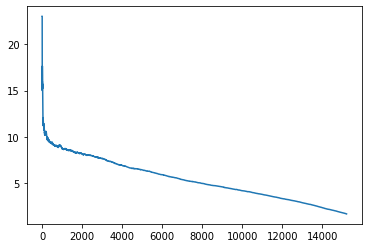

In [71]:
igre['Razlika'] = igre['Metascore'] - igre['Ocena uporabnikov']*10
def razlika_ocen (k):
    return igre['Razlika'][:k].mean()

x = []
y = []

for k in range(0,15219):
    x.append(k)
    y.append(razlika_ocen(k))
plt.plot(x,y) 
razlika_ocen(15219)

0.015355283273644047

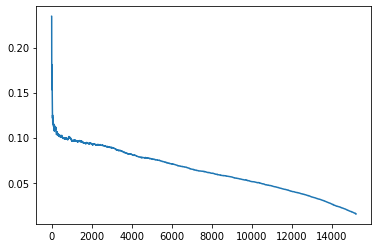

In [91]:
igre['Procent'] = (igre['Metascore'] - igre['Ocena uporabnikov']*10)/igre['Metascore']
def razlika_ocen_procent (k):
    return igre['Procent'][:k].mean()

x = []
y = []

for k in range(0,15219):
    x.append(k)
    y.append(razlika_ocen_procent(k))
plt.plot(x,y) 
razlika_ocen_procent(15219)

V zgornjih dveh grafih je prikazano absolutno in relativno odstopanje ocene uporabnikov od ocene na metascoru. Pri obeh je za najboljše igre veliko odstopanje, a v povprečju je absolutno metascore ocena višja za 1.7 ocene, relativno za 1.5 odstotka.

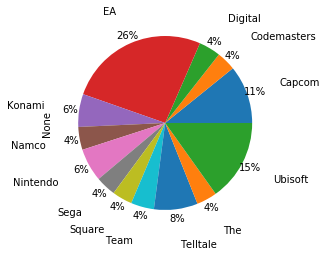

In [52]:
zaloz = igre.groupby('Založnik').size()
zaloz[zaloz>100].plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4)

Iz tortnega diagrama se vidi, da sta največja založnika Electronic Arts in Ubisoft. Ker sta oba imela več ponesrečenih iger, ju ni med najboljšimi tridesetimi založniki glede na ocene njihovih iger. 

In [103]:
felc = igre[igre['Založnik']=='Zen'].groupby('Založnik').mean()

zal = zaloz[zaloz>27].reset_index()
for zaloznik in zal['Založnik']:
    felc = felc.append(igre[igre['Založnik']==zaloznik].groupby('Založnik').mean())
felc = felc.sort_values('Skupna ocena', ascending=False).drop(columns='Procent')

felc.head(30)

,Metascore,Ocena uporabnikov,Skupna ocena
Založnik,,,
Valve,86.821429,7.964286,83.232143
Rockstar,84.695652,7.711594,80.905797
Intelligent Systems,83.588235,7.720588,80.397059
Rare,80.096774,7.925806,79.677419
Blizzard,86.435897,7.179487,79.115385
Firaxis,83.447368,7.444737,78.947368
Neversoft,80.921569,7.621569,78.568627
Criterion,82.176471,7.464706,78.411765
Harmonix,80.418605,7.627907,78.348837


Najboljši založnik z več kot 27 izdanimi igrami je Valve, ki ima najvišjo povprečo oceno v vseh kategorijah. To ni presenečenje, saj so z izjemo Artifacta za vsako igro poželi priznanja kritikov ter so razvili dve od treh iger, Counter Strike: Global Offensive in Dota 2,  ki so trenunto na vrho esport scene. Na seznamu žal ni Riot Games, razvijalca League of Legends, tretjega člana trenutnega vrha esporta, zaradi premajhnega števila izdanih iger.
Sledi jim Rockstar, založniki serij Grand Theft Auto in Max Payne ter legendarni Blizzard, razvijalec World of Warcrafta, Diabla, Owerwatcha ter StarCrafta, ene prvih iger z aktivno esport sceno.    

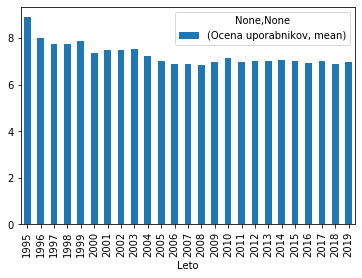

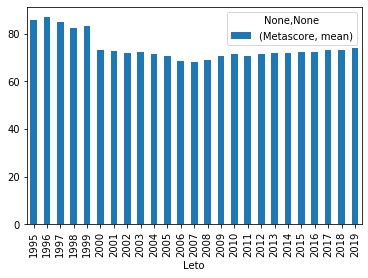

In [54]:
igre1 = igre.drop(['Skupna ocena', 'Razlika'], axis = 1)
igre2 = igre1.drop(columns='Metascore')
igre3 = igre1.drop(columns='Ocena uporabnikov')
igre2.groupby([igre['Datum izdaje'].dt.year.rename('Leto')]).agg({'mean'}).plot.bar()
igre3.groupby([igre['Datum izdaje'].dt.year.rename('Leto')]).agg({'mean'}).plot.bar()

V grafih so prikazane povprečne ocene iger v posameznem letu iz strani metascora in uporabnikov. Zanimivo je, da so igre, ustvarjene pred Metascorom leta 1999, višje ocenjene kot igre po 1999. 

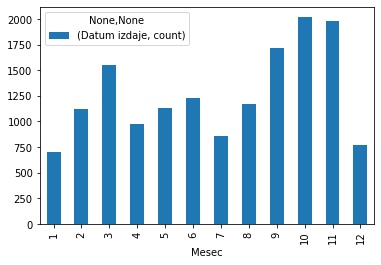

In [55]:
sumarija = igre.groupby([igre['Datum izdaje'].dt.month.rename('Mesec')]).agg({'count'})[['Datum izdaje']]
sumarija.plot.bar()

Če primerjamo število izdanih iger glede na mesec, lahko opazimo dva vzorca. Prvi je porast izdaj iger jeseni, večinoma oktobra in novembra, saj je to v času črnega petka in priprave na božično nakupovanje. Drugi porast je pomladi, delno iz priprave na poletuje, delno ker je bilo će dovolj časa od novega leta in od božiča, da se ustvari prostor za nove izdaje.

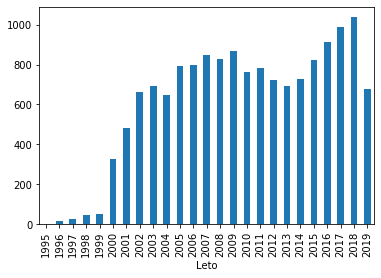

In [56]:
vsota = igre.groupby(igre['Datum izdaje'].dt.year.rename('Leto')).count()
vsota['Datum izdaje'].plot.bar()

V pregledu izdaj iger skozi leta je zaradi vedno večje priljubljenosti tudi vedno več iger, saj se trg za nijih širi.

-152.25684568032264

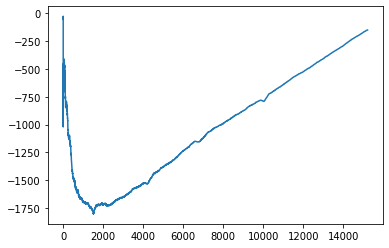

In [107]:
igre['Razlika'] = abs(igre.index)
pomozna = igre.sort_values('Ocena uporabnikov', ascending=False)
pomozna.reset_index()
igre['Dejanska razlika'] = (igre.index-pomozna.index)/2

def razlika_polozaja (k):
    return igre['Dejanska razlika'][:k].mean()

x = []
y = []

for k in range(0,15219):
    x.append(k)
    y.append(razlika(k))
plt.plot(x,y) 
razlika_polozaja(15220)

Zgornji graf prikazuje povprečno razliko med mestom igre glede na oceno metascora in ocene uporabnikov. Indeks je deljen z dva saj to potem pove pove oddaljenost od mesta, ki bi ga igra morala zasesti po uravnoteženi oceni. Če so igre urejene po oceni metascora, so v povprečju 152 mest pod mestom, ki bi ga zasedle po uravnoteženi oceni. 

In [75]:
def obtezeno_k_najboljsih (p, k):
    #p predstavlja delež ocene metascore, ki bo uprabljen v izračunu obrtežene ocene
    if k < 1 or k > 15219 or type(k)!=int:
        return 'Drugo število mora biti celo in med 1 ter 15219'
    
    if p == 1:
        return igre.sort_values('Ocena uporabnikov', ascending = False).reset_index()
    
    if p == 0:
        return igre
    
    if p > 1 or p<0 or type(p)!=float :
        return 'Prvo število mora biti med 0 in 1'
    
    igre['Obtezeno'] = p*igre['Metascore'] + (1-p)*igre['Ocena uporabnikov']
    
    return igre.sort_values('Obtezeno', ascending=False).drop(columns='Obtezeno').reset_index()[:k]

In [108]:
obtezeno_k_najboljsih(0.3,10)

,stevilka,konzola,naslov,povzetek,Metascore,Ocena uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum izdaje,Procent,Razlika,Dejanska razlika
0,17.0,Playstation 4,Grand Theft Auto V,The sprawling sun-soaked metropolis of Los San...,97.0,9.2,M,Rockstar,Modern,Open-World,94.5,2014-11-18,0.051546,17.0,-45.5
1,6.0,Wii,Super Mario Galaxy,[Metacritic's 2007 Wii Game of the Year] The u...,97.0,9.1,E,Nintendo,3D,3D,94.0,2007-11-12,0.061856,6.0,-117.5
2,3.0,Playstation 3,Grand Theft Auto IV,[Metacritic's 2008 PS3 Game of the Year; Also ...,98.0,8.6,M,Rockstar,Modern,Open-World,92.0,2008-04-29,0.122449,3.0,-7.0
3,5.0,Xbox 360,Grand Theft Auto IV,[Metacritic's 2008 Xbox 360 Game of the Year; ...,97.0,9.0,M,Rockstar,Modern,Open-World,93.5,2008-04-29,0.072165,5.0,-136.0
4,14.0,Playstation 2,Tony Hawk's Pro Skater 3,Challenge up to four friends in online competi...,97.0,8.9,T,Neversoft,Alternative,Skateboarding,93.0,2001-10-28,0.082474,14.0,-14.5
5,19.0,Playstation 2,Grand Theft Auto III,Players are put at the heart of their very own...,97.0,8.9,M,DMA,Action Adventure,Modern,93.0,2001-10-22,0.082474,19.0,-193.0
6,30.0,Xbox 360,The Orange Box,Games included in The Orange Box compilation: ...,96.0,9.2,M,Valve,First-Person,Sci-Fi,94.0,2007-10-10,0.041667,30.0,-2428.0
7,28.0,Playstation 3,Uncharted 2: Among Thieves,Fortune hunter Nathan Drake returns in Unchart...,96.0,9.2,M,Capcom,Action Adventure,Horror,94.0,2009-10-13,0.041667,28.0,-134.0
8,22.0,Dreamcast,NFL 2K1,"In the end, NFL 2K1 is a deeper, more refined ...",96.0,9.1,E,Visual,Football,Sim,93.5,2000-09-07,0.052083,22.0,-202.5
9,32.0,Playstation 3,Batman: Arkham City,"Developed by Rocksteady Studios, Batman: Arkha...",96.0,9.1,T,Rocksteady,Fantasy,Open-World,93.5,2011-10-18,0.052083,32.0,-12.5


Zgornja funkcija nam omogoči poljubno obteževanje ocene metascora in ocene uporabnikov, iz kjer lahko dobimo ustreznih 'k' najbolje ocenjenih iger.

# Zaključek

Iz analize je razvidno, da metascore ocene niso preveč v skaldu z ocenami uporabnikov, ki bi morale biti pomembnejše v ocenjevanju iger kot ocene kritikov. Obe strani pa se strinjata glede dobrih iger, kar je razvidno iz tabele povprečij razvijalcev. Najbolje ocenjene igre večinoma izhajajo iz let med 2000 in 2010, ko se z lepim grafičnim dizajnom ni bilo še mogoče skriti pomankljivosti v zgodbah iger ali načinom igranja. Čeprav je največ iger izdanih za PC, so najbolje ocenjene večinoma za konzole, saj je bil to prvotni dom za video igre. 